# TIME SERIES

# Why TS
Some time we only have target value in different time intervale unlike Liner Regression. So we plot this value and do our analysis.When have one feature only its called Univarient TS Forcasting.

## Time Series Data VS Cross Section Data
* Cross Section Data = 2020 | f1 |f2 | f3 ....
* Time Series Data= f1 | 2010|2011|2012|2013....|2020  same data different time intervales


# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

We Follow these steps

Why we need time series?
* When we have one one feature e.i. Time and the target value and np other independent features.
    *eg sales per month.

### ------------------------------------------------------------------------------------------------------------------

# Different Component of Time Series
### Trend
        * Objerving data in long run of time and has been there for more than a year.
            * 1. Uptreand 2. Down Trend 3. Stationary/Horizontal
            It does not happen again n again it happens for some time then it disappears.
### Seasonal
        * Repeating patern for fix time period 1.Upward 2.Downward 
             eg sales on Xmas each year increase 
### Irregularity | Random 
* Not possible to predict
        * Also called Noise or Residuel , happens for short duration and non repeating.
       eg Covid raise the sales of paracitamol , which will go down and might never happen again.
### Cyclic
           * A pattern keep repeating but no fix time, it may occour in 2 then 7 then 13 n so on.              Very hard to predict. 
### --------------------------------------------------------------------------------------------------------------------

# Different Time Series Processes
### White Noise
* When the data set is purely random such that varience is constant and mean is zero eg ~~~ unun
    No pattern is found in data and its useless to do TSF. 
    
# AR- AutoRegressive Model 
* Forecasting is done on the bases of past e.i. f(t)=t-1,t-2,t-3...
* AR(p)- p is for parameters
* p=1,2,3
* Yt=Yt-1+Yt-2+Yt-3 we usually stop at three as gap is to long after that.AR(0),AR(1),AR(2),AR(3)

# MA- Moving Average Model
Praposal was made to use error that we have to forcast instead of past.
Y=e1+e2+e3....en

# ARMA- Auto Regressive Moving Average
This model performed better and results where more accurate.

# When Not To Apply Time Series.

### 1. When values are constant.
     * eg sales for 3 month is 500 500 500 so its constant so of no use.
### 2. When values are in form of function.
     * eg f(x)-- just put value in x and you can get the answer.
            
### -------------------------------------------------------------------------------------------------------------------

#  Stationarity

* For theoritical point of view we need data to be stationary other wise our model is not consider reliable.

Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

* In simple words the do not change with time.
* It is not the case most of the time so we need to make it stationary.
* To do this we use differential tech,We find the difference between two interval and then plot it.

## Strickly Stationary
* If join distribution of data set remain same / unchaged over time.
* join distribution when we combine 2 data set and observe there distribution

## Weakly Stationary AKA Covarience Stationary
* It has mean and variance is constant
* It depends only of difference of time
* The joint probablity distribution still be different and we want it to be same but we are relaxing it here.

###### It is also true for all strickly stationary data set. So all strickly stationary are also weekly stationary but vice versa is not true.

### It always be there in time series.
    * Time series data has a particular behaviour and there is a good chance it will repeat itself.
    * Time series requires data to be stationary.To apply any kind of stats model.
    * Two major reason for not having stationary data is :
        * Trend .. varing mean over time.
        * Seasonality

# To Check The Stationarity we have two popular test.
### 1. Rolling Test   
             * Plot the Moving Avg and see if it varies with time.A visuallization technique.
### 2. ADCF Test (augmented dickey–fuller test )
             * Null hypothesis that time series is non-Stationary and as per p value we accept                  (fail to reject) or reject null hypothesis.

# ARIMA Model
### Combination of 2 models 
AR-Auto Regressive + MA -- Moving Average
AR (p=auto regresive lags)+I(Integration d= order of differentiation)+ MA (q=Moving AVG)
* Very PowerFull Model
* AR and MA are seperate model binded by intregation.
#### AR is basically corelation between previous time period to current.
        * We plot partial autocorelation graph to predict the value of p.= PACF
#### MA we basically take the avg of event happened in diff t1 t2 t3 e.i. time periods.
        * For q value we plot Auto Corelation Plot = ACF

#### I value depend of order if order of 1 then 1 ,if order of 2 then 2 and so on. Basically how many time it has been differentiated.
* When a data series is differentiated we call it integrated and order is as many time we differentiated it.

#### ----------------------------------------------------------------------------------------------------------------------------------


###### In rolling window can be monthly =12 or daily =365 

####  Steps
* Check for white noise ,if found dont do any thing
* Check data is stationary or not,if not make it stationary first.
* Modeling

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head() #sales per month

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
## Cleaning up the data , changing name of columns
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
## Drop last 2 rows as they have null 
df.drop(106,axis=0,inplace=True)

In [7]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('Month',inplace=True)

In [13]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

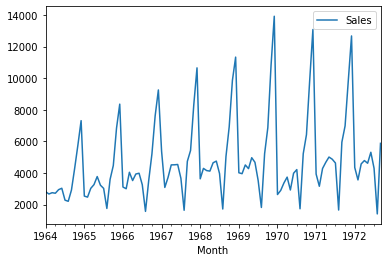

In [15]:
df.plot()

###### In above plot data looks like seasonal data ,as every year sales goes high at a particular month

###### Now we will check if data is stationary or not.

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['Sales']) # adfuller give us 5 values

In [18]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-1.8335930563276237, 0.3639157716602447, 11, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, 1478.4633060594724)


### Most important value is p-value above

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [20]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series is non-stationary 


As p value is greater then .05 we are going to accept the null hypothesis-- Non Stationary

Now when your data is non stationary we do the below steps.

## Differencing

In [21]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [22]:
df['Sales'].shift(1).head() # its shift one down

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
Name: Sales, dtype: float64

In [23]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12) 
#as seasonal its a 12 month data

In [24]:
df.head(14) #when subtracted with nan we get a nan

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [25]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


2.060579696813685e-11 is smaller then p so we are rejecting null now

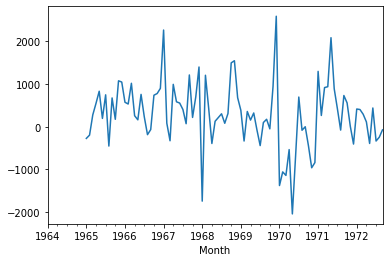

In [26]:
df['Seasonal First Difference'].plot()

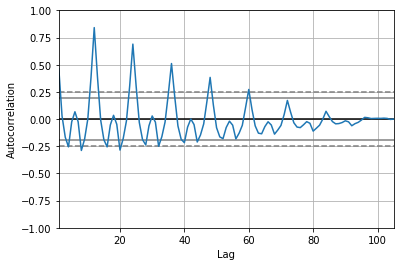

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation
###### Auto corelation = Relation to itself

##### We calculate ACF and PACF to check at what extend current value are related to past value.
##### It tell us how many lags or period in past we should consider for forecasting.

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

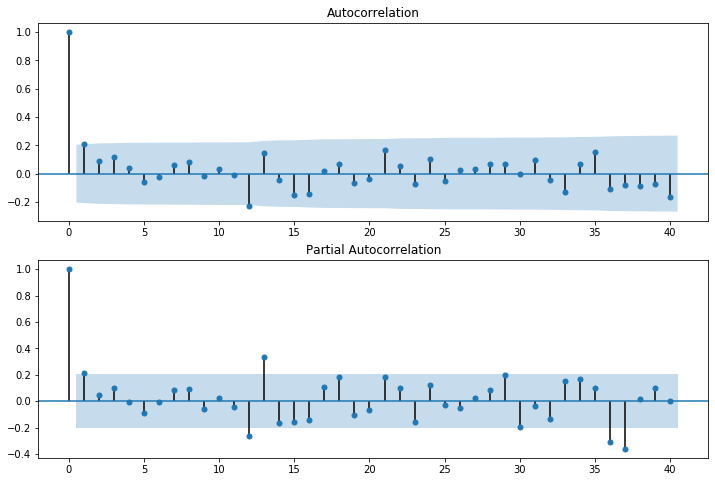

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [35]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [36]:
model=ARIMA(df['Sales'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\HP\Anaconda3\envs\py\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\Anaconda3\envs\py\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 10 Oct 2020   AIC                           1910.251
Time:                        17:20:36   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7822     12.405      1.836      0.066      -1.532      47.096
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

We can use the predict() function on the ARIMAResults object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

If we used 100 observations in the training dataset to fit the model, then the index of the next time step for making a prediction would be specified to the prediction function as start=101, end=101. This would return an array with one element containing the prediction.



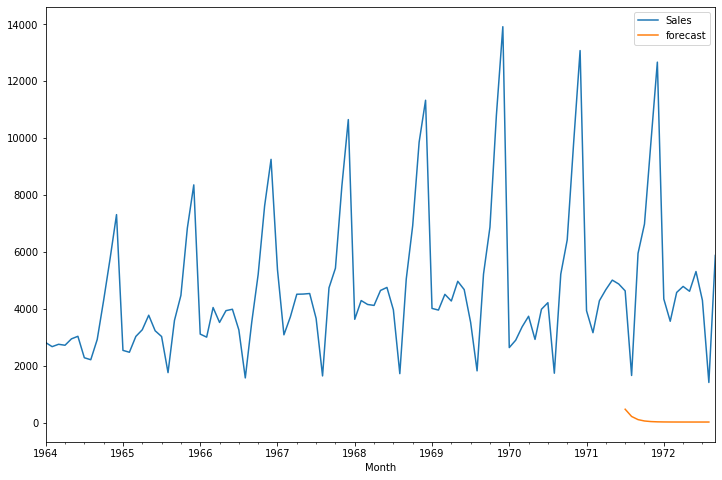

In [38]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [39]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [40]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\HP\Anaconda3\envs\py\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\Anaconda3\envs\py\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


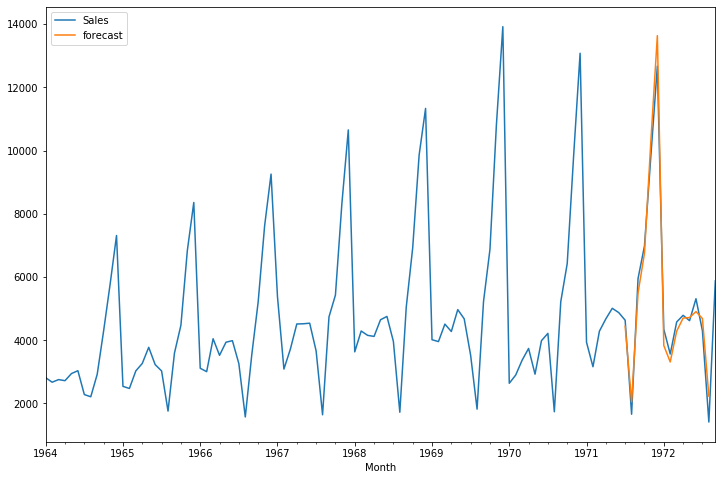

In [41]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

blue is actual and orange line is predict

#  Making data for testing

In [42]:
#creating some data to predict future of this.
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [43]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [44]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [45]:
future_df=pd.concat([df,future_datest_df])

#### future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

######  ----------------------------------------------End Of Sheet----------------------------------------------------------------------